# Data Visualization

---

### Learning Objectives

- Learn how to plot with matplotlib
- Set universal plot settings.
- Produce scatter plots, line plots, and histograms using seaborn and matplotlib.
- Understand how to graphically explore relationships between variables.
- Apply grids for faceting in seaborn.
- Use seaborn grids with matplotlib functions

### Lesson outline

- Data visualization with matplotlib and seaborn
    - Intro to plotting with matplotlib
    - Visualizing one quantitative variable with multiple categorical variables
    - Visualizing the relationship of two quantitative variable
      with multiple categorical variables (time permititng)

---

## Short review from last session 
### (+ review split-apply-combine that we didn't have time to go through last session) 

Do you remember how to:

1 - Read in the data from the csv file?

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

2 - How to select only the columns 'country' and 'year' from the dataframe?

In [2]:
world_data[['country', 'year']]

,country,year
0,Afghanistan,1800
1,Afghanistan,1801
2,Afghanistan,1802
3,Afghanistan,1803
4,Afghanistan,1804
...,...,...
39196,Zimbabwe,2014
39197,Zimbabwe,2015
39198,Zimbabwe,2016
39199,Zimbabwe,2017


3 - How to select a few rows together with the columns above?

In [3]:
world_data.loc[[1, 13, 24], ['country', 'year']]

,country,year
1,Afghanistan,1801
13,Afghanistan,1813
24,Afghanistan,1824


4 - How to select only data from year 1995?

In [4]:
world_data.loc[world_data['year'] == 1995]

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
195,Afghanistan,1995,17100000,Asia,Southern Asia,Low,51.1,881,7.61,150.0,26.2,0.0727,2.56,0.49
414,Albania,1995,3110000,Europe,Southern Europe,Upper middle,74.1,4130,2.59,32.9,113.0,0.6720,9.31,9.07
633,Algeria,1995,28900000,Africa,Northern Africa,Upper middle,72.3,9300,3.45,43.3,12.1,3.3000,5.67,4.84
852,Angola,1995,14300000,Africa,Sub-Saharan Africa,Lower middle,52.0,2970,6.92,223.0,11.4,0.7690,4.89,3.05
1071,Antigua and Barbuda,1995,73600,Americas,Latin America and the Caribbean,High,74.4,16500,2.21,19.5,167.0,3.7400,10.50,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38301,Venezuela,1995,22200000,Americas,Latin America and the Caribbean,Upper middle,73.0,15300,3.08,26.2,25.2,6.0100,7.87,8.22
38520,Vietnam,1995,75200000,Asia,South-eastern Asia,Lower middle,69.5,2040,2.71,39.0,243.0,0.3870,7.23,6.63
38739,Yemen,1995,15300000,Asia,Western Asia,Low,60.5,3530,7.53,112.0,29.0,0.6830,4.71,0.95
38958,Zambia,1995,9140000,Africa,Sub-Saharan Africa,Lower middle,46.5,2030,6.19,177.0,12.3,0.2380,6.73,5.13


5 - Select only the rows where the region is Asia or Africa.

In [5]:
world_data.loc[world_data['region'].isin(['Asia', 'Africa'])]

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39196,Zimbabwe,2014,15400000,Africa,Sub-Saharan Africa,Low,57.0,1910,3.90,64.3,39.8,0.78,10.9,10.0
39197,Zimbabwe,2015,15800000,Africa,Sub-Saharan Africa,Low,58.3,1890,3.84,59.9,40.8,NaN,11.1,10.2
39198,Zimbabwe,2016,16200000,Africa,Sub-Saharan Africa,Low,59.3,1860,3.76,56.4,41.7,NaN,NaN,NaN
39199,Zimbabwe,2017,16500000,Africa,Sub-Saharan Africa,Low,59.8,1910,3.68,56.8,42.7,NaN,NaN,NaN


6 - Calculate the total population in each region

In [6]:
world_data.groupby('region')['population'].sum()

region
Africa       59192998600
Americas     63837885500
Asia        330133218800
Europe       98766930400
Oceania      27910937600
Name: population, dtype: int64

7 - Get the number of countries in each region for the year 2018.

In [5]:
world_data.loc[world_data['year'] == 2018].groupby('region').size()

region
Africa      52
Americas    31
Asia        47
Europe      39
Oceania     10
dtype: int64

## Introduction to plotting

The human visual system is one of the most advanced apparatuses for detecting patterns
and it allows for quick exploration of complex visual relationships.
Data visualization is therefore a quick, efficient way of unearthing clues to interesting features in the data
that can later be investigated in a robust, quantitative manner.
Visualizations are also unparalleled in communicating insights drawn from data.
For these reasons,
it is important to possess the skills to graphically represent the data
in a way that is efficient for humans to process.

There are many plotting packages in Python,
making it possible to create diverse visualizations
such as interactive web graphics, 3D animations, statistical visualizations, and map-based plots.
When starting out,
it can be helpful to find an example of how a plot looks that you want to create
and then copy and modify that code.
Examples of plots can be found in many excellent online Python plotting galleries,
such as those from [matplotlib][mpl-gal], [seaborn][sns-gal], and [the Python graph gallery].

[mpl-gal]: https://matplotlib.org/gallery.html
[sns-gal]: https://seaborn.pydata.org/examples/
[the Python graph gallery]: https://python-graph-gallery.com/all-charts/

Our focus will be on two of the most useful packages for creating publication quality visualizations:
`matplotlib`,
which is a robust, detail-oriented, low level plotting interface,
and `seaborn`,
which provides high level functions on top of `matplotlib`
and allows the plotting calls to be expressed in terms what is being explored in the underlying data
rather than what graphical elements to add to the plot.
The high-level figures created by `seaborn` can be configured via the `matplotlib` parameters,
so learning these packages in tandem is useful.

To facilitate our understanding of plotting concepts,
the initial examples here will not include dataframes,
but instead have simple lists holding just a few data points.
To create a line plot,
the `plot()` function from `matplotlib.pyplot` can be used.

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 2, 4, 3]
plt.plot(x ,y)

Using `plot()` like this is not very explicit
and a few things happens "under the hood",
e.g. a figure is automatically created
and it is assumed that the plot should go into the currently active region of this figure.
This gives little control over exactly where to place the plots within a figure
and how to make modifications the plot after creating it,
e.g. adding a title or labeling the axes.

To facilitate modifications to the plot,
it is recommended to use the object oriented plotting interface in `matplotlib`,
where an empty figure and at least one axes object is explicitly created
before a plot is added to it.
This figure and its axes objects are assigned to variable names
which are then used for plotting.
In `matplotlib`,
an axes object refers to what you would often call a subplot colloquially
and it is named "axes" because it consists of an x-axis and a y-axis by default.

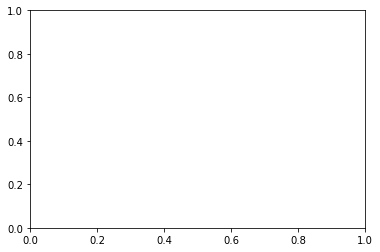

In [9]:
fig, ax = plt.subplots()

Calling `subplots()` returns two objects,
the figure and its axes object.
Plots can be added to the axes object of the figure
by using the name we assigned to the returned axes object (`ax` by convention).

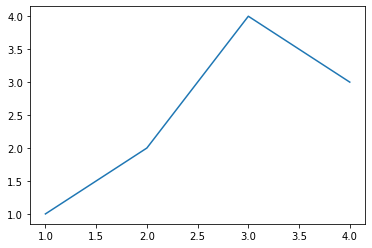

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y)

To create a scatter plot,
use `scatter()` instead of `plot()`.

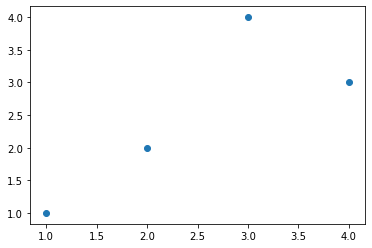

In [11]:
fig, ax = plt.subplots()
ax.scatter(x, y)

Plots can also be combined together in the same axes.
The line style and marker color can be changed
to facilitate viewing the elements in th combined plot.

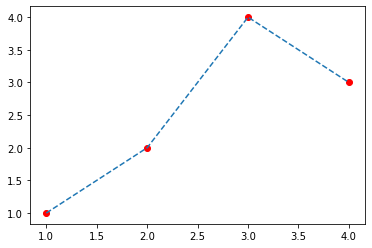

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

And plot elements can be resized.

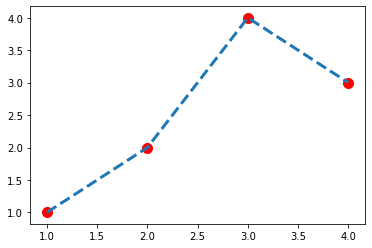

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', s=100)
ax.plot(x, y, linestyle='dashed', linewidth=3)

It is common to modify the plot after creating it,
e.g. adding a title or label the axis.

Text(0.5, 0, 'Measurement X')

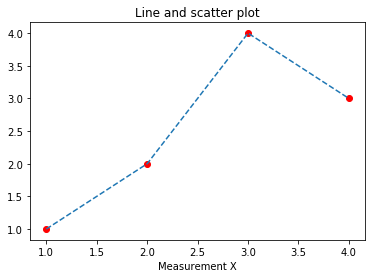

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

ax.set_title('Line and scatter plot')
ax.set_xlabel('Measurement X')

The scatter and line plots can easily be separated into two subplots within the same figure,
by telling `plt.subplots` to create a figure with one row and two columns
(so two subplots side by side).
This returns two axes objects,
one for each subplot,
which we assign to the variable names `ax1` and `ax2`.

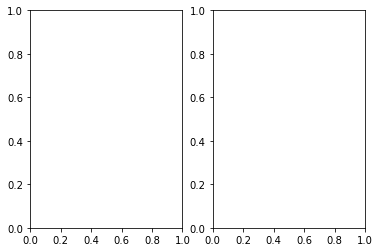

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# The default is (1, 1), that's why it does not need
# to be specified with only one subplot

To prevent plot elements,
such as the axis tick labels from overlapping,
`tight_layout()` method can be used.

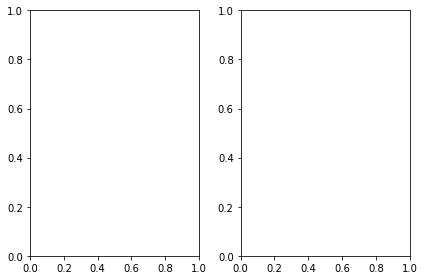

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

The figure size can easily be controlled when it is created.

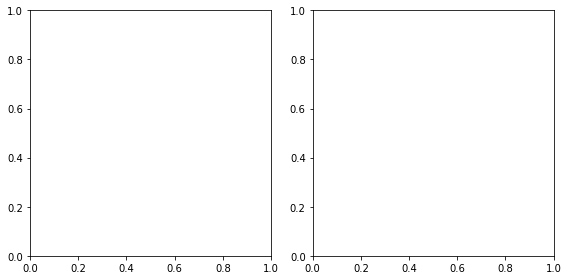

In [10]:
# `figsize` refers to the size of the figure in inches when printed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()

Bringing it all together to separate the line and scatter plot.

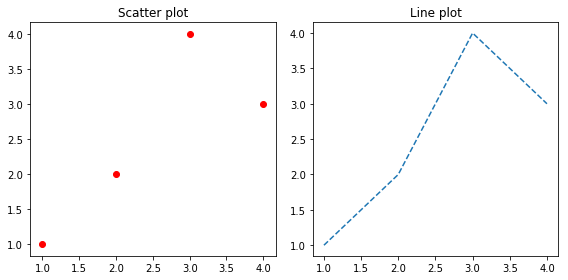

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(x, y, color='red')
ax2.plot(x, y, linestyle='dashed')

ax1.set_title('Scatter plot')
ax2.set_title('Line plot')
fig.tight_layout()

> #### Challenge 1
>
> 1. There is a plethora of colors available to use in `matplotlib`.
>    Change the color of the line and the dots in the figure using [your favorite color from this list].
> 2. Use the documentation to change the styling of the line in the line plot
     and the type of marker used in the scatter plot
     (you might need to search online to figure this out).

[your favorite color from this list]: https://stackoverflow.com/a/37232760/2166823

### Saving plots

Figures can be saved by calling the `savefig()` method
and specifying the name of file to create.
The resolution of the figure can be controlled by the `dpi` parameter.

In [19]:
fig.savefig('scatter-and-line.png', dpi=300)

In the JupyterLab file browser,
you can see that a new image file has been created.
A PDF-file can be saved
by changing the extension in the specified file name.
Since PDF is a vector file format,
it is not possible to specify a resolution.

In [20]:
fig.savefig('scatter-and-line.pdf')

This concludes the customization section.
The concepts taught here will be applied in the next section
on how to choose a suitable plot type for data sets with many observations.

## Plotting dataframes

If the dataframe from the previous lecture is not loaded,
read it in first.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

We can use `scatter()` with the `data` parameter
to plot columns from the dataframe.

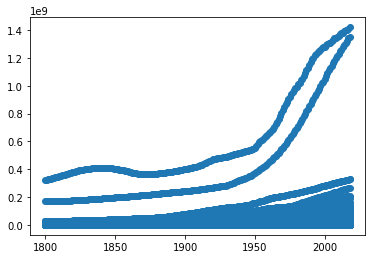

In [13]:
fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=world_data)

The reason for the not immediately intuitive appearance of this graph,
is that one scatter dot has been added for each year for every country.
To instead see how the world's total population has changes over the years,
the population from each country for each year needs to be summed together.
This can be done using the dataframe techniques from the previous lecture.

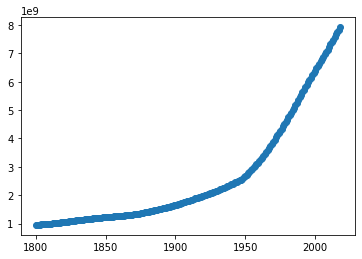

In [5]:
# One could also do `as_index=False` with `groupby()`
world_pop = world_data.groupby('year')['population'].sum().reset_index()

fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=world_pop)

This plot shows that the world population has been steadily increasing since the 1800s
and dramatically picked up pace in the 1950s.

It is possible to use `matplotlib` in this way to explore visual relationships in dataframe.
However,
it is a little cumbersome already with these simple examples
and it will get more complicated once we want to include more variables,
e.g. stratifying the data in subplots based on region and income level
would include writing double loops and keeping track of plot
layout and grouping variables manually.
The Python package [seaborn] is designed for effectively exploring data visually
without getting bogged down in technical plotting details.

[seaborn]: (https://seaborn.pydata.org/introduction.html#introduction)

## Visual data exploration with `seaborn`

When visually exploring data with lots of variables,
it is in many cases easier to think in terms of what is to be explored in the data,
rather than what graphical elements are to be added to the plot.
For example,
instead of instructing the computer to
"go through a dataframe and plot any observations of country X in blue,
any observations of country Y in red, etc",
it is easier to just type "color the data by country".
There are many benefits to using a so called *descriptive* syntax,
instead of an *imperative* one.

Facilitating semantic mappings of data variable to graphical elements
is one of the goals of the seaborn plotting package.
Thanks to its functional way of interfacing with data,
only minimal changes are required if the underlying data change
or to switch the type of plot used for the visualization.
`seaborn` provides a language that facilitates thinking about data
in ways that are conducive for exploratory data analysis
and allows for the creation of publication quality plots
with minimal adjustments and tweaking.

The seaborn syntax is similar to how matplotlib plots dataframes.
For example,
to make the same scatter plot as above:

In [3]:
import seaborn as sns

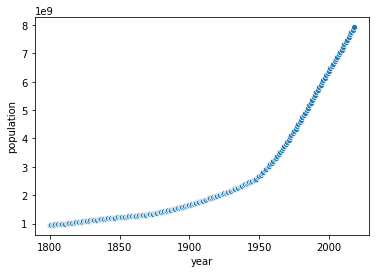

In [6]:
sns.scatterplot(x='year', y='population', data=world_pop)

In addition to providing a data-centric syntax,
`seaborn` also facilitates visualization of common statistical aggregations.
For example, when creating a line plot in `seaborn`,
the default is to aggregate and average all observations with the same value on the x-axis,
and to create a shaded region representing the 95% confidence interval for these observations.

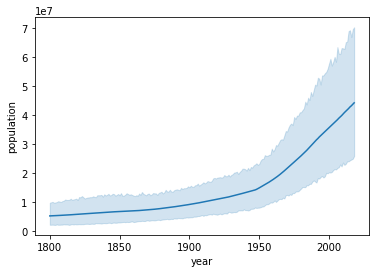

In [13]:
sns.lineplot(x='year', y='population', data=world_data);

In this case,
it would be more appropriate to have the shaded area describe the variation in the data,
such as the standard deviation,
rather than an inference about the reproducibility,
such as the default 95% CI.

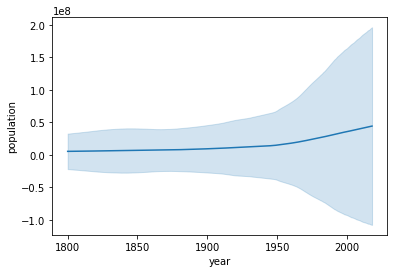

In [15]:
sns.lineplot(x='year', y='population', data=world_data, ci='sd');

To change from showing the average world population per country and year
to showing the total population for all countries per year,
the `estimator` parameter can be used.
Here,
the shaded are is also removed with `ci=None`.

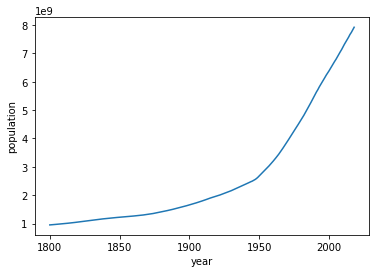

In [12]:
# The `estimator` parameter is currently non-functional for sns.scatterplot, but will be added soon
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)

### Changing graph aesthetics

Before continuing the exploration of the world population data,
let's discuss how to customize the appearance of our plots.
The returned object is an matplotlib axes,
so all configuration available through `matplotlib` can be applied to the returned object by first assigning it to a variable name (`ax` by convention).

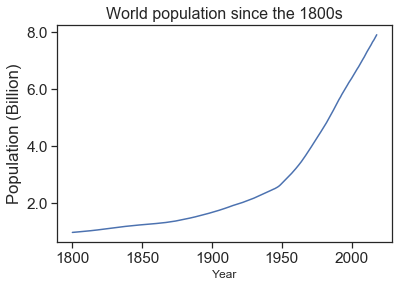

In [34]:
ax = sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)
ax.set_title('World population since the 1800s', fontsize=16)
ax.set_xlabel('Year', fontsize=12)

# to change the appearance (scale) of the y axis labels 
ax.set_yticklabels(ax.get_yticks()/1000000000);
ax.set(ylabel='Population (Billion)');

In addition to all the customization available through the standard `matplotlib` syntax,
`seaborn` also offers its own functions for changing the appearance of the plots.

In essence,
these functions are shortcuts to change several `matplotlib` parameters simultaneously
For example,
a more effective approach than setting individual font sizes or colors of graphical elements
is to set the overall size and style for all graphs.

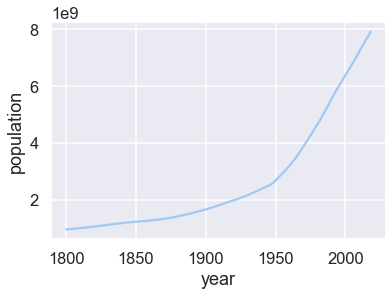

In [17]:
sns.set(context='talk', style='darkgrid', palette='pastel')
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None);

These functions are analogues to making changes in the settings menu of a graphical program
and they will apply to all following plots.

> #### Challenge 2
>
> Find out which styles and contexts are available in seaborn.
> Try some of them out and choose your favorite style and context.
> *Hint* This information is available both through the built-in and the online documentation.

For the rest of this tutorial, the `ticks` style will be used.

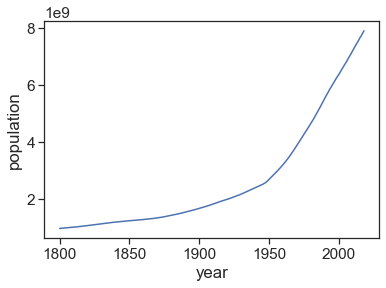

In [23]:
sns.set(context='notebook', style='ticks', font_scale=1.4)
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None);

For styles that include the frame around the plot,
there is a special `seaborn` function to remove the top- and rightmost borders
(again by modifying `matplotlib` parameters under the hood).

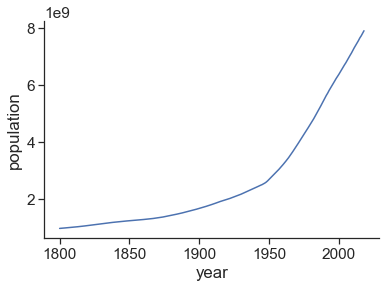

In [35]:
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)
sns.despine()

If the style options exposed through `seaborn` are not sufficient,
it is possible to change all plot parameters directly through the `matplotlib` [rc and style interfaces].

[rc and style interfaces]: https://matplotlib.org/users/customizing.html#customizing-matplotlib

### Exploring relationships between two quantitative variables

As mentioned above,
the main strength of a descriptive plotting syntax
lies in describing the plot appearance in human-friendly vocabulary
and have the computer assign variables to graphical objects accordingly.
For example,
to plot subsets of the data in different colors,
the `hue` parameter can be used.

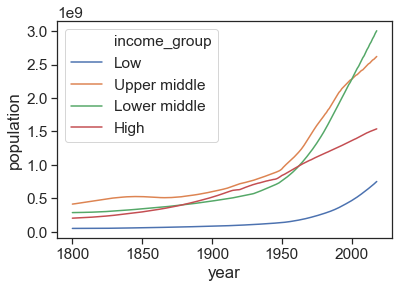

In [36]:
sns.lineplot(x='year', y='population', hue='income_group',
            data=world_data, ci=None, estimator='sum');

This stratification of the income groups
reveals that the population growth has been the fastest in middle income countries.

The plot can be made more accessible
(especially to those with color vision deficiency)
by changing the style of each line
instead of only relying on color to separate them.

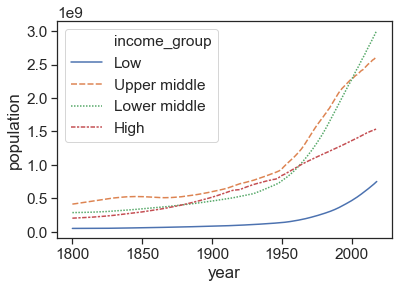

In [41]:
sns.lineplot(x='year', y='population', hue='income_group', style='income_group',
            data=world_data, ci=None, estimator='sum');

Just like in the previous lecture,
the values of the ordinal variable `income_group` are not listed in an intuitive order.
A custom order can easily be specified by passing a list to the `hue_order` parameter,
but this would have to be done for every plot.
A more effective approach is to encode the order in the dataframe itself,
using the top level `pandas` function `Categorical()`.

In [42]:
world_data['income_group'] = (
    pd.Categorical(world_data['income_group'], ordered=True,
                   categories=['Low', 'Lower middle', 'Upper middle', 'High'])
)
world_data['income_group'].dtype

CategoricalDtype(categories=['Low', 'Lower middle', 'Upper middle', 'High'], ordered=True)

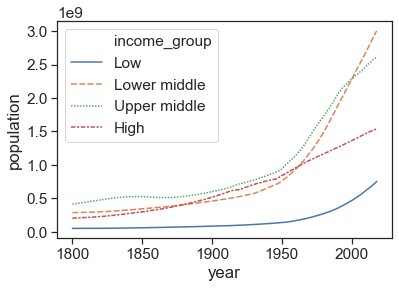

In [44]:
sns.lineplot(x='year', y='population', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='sum');

The legend now lists the colors in the expected order.
This modification also ensures that when making plots with income groups on the x- or y-axis,
they will be plotted in the expected order.

### Conditioning quantitative relationships on qualitative variables

It is difficult to explore multiple categorical relationships within one single plot.
For example,
to see how the income groups compare within each region,
the `hue` and `style` variables could be used for different variables,
but this makes the plot dense and difficult to interpret.

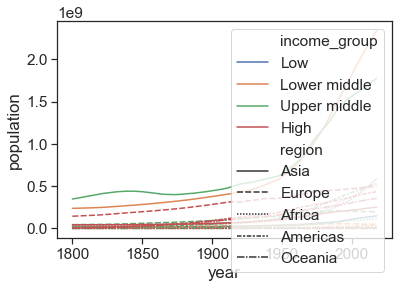

In [46]:
sns.lineplot(x='year', y='population', hue='income_group', style='region',
            data=world_data, ci=None, estimator='sum');

An effective approach for exploring multiple categorical variables in a data set
is to plot so-called "small multiples" of the data,
where the same type of plot is used for different subsets of the data.
These subplots are drawn in rows and columns forming a grid pattern,
and can be referred to as a "facet", "lattice" or "trellis" plot.

Visualizing categorical variables in this manner is a key step in exploratory data analysis,
and thus `seaborn` has a dedicated plot function for this,
called `relplot()`
(for "relational plot" since it visualizes the relationships between numerical variables).
The syntax to `relplot()` is very similar to `lineplot()`,
but we need to specify that the kind of plot we want is a line plot.

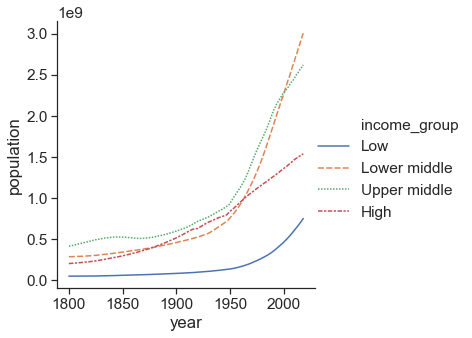

In [48]:
# Create the same plot as above
sns.relplot(x='year', y='population', hue='income_group', style='income_group', kind='line',
            data=world_data, ci=None, estimator='sum');

The `region` variable can now be mapped to different facets/subplots in a grid pattern.

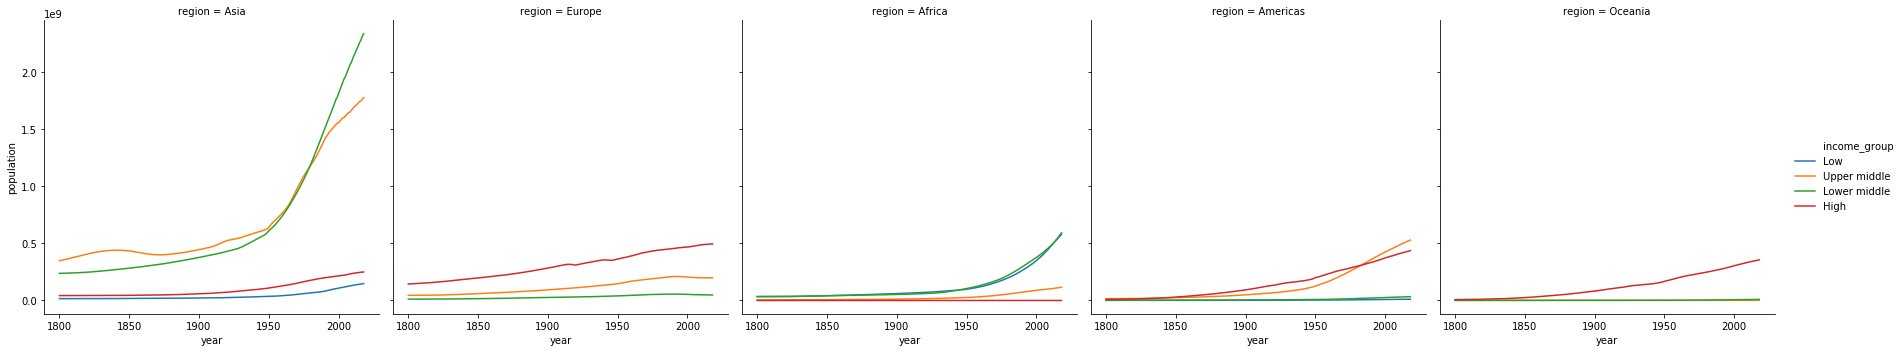

In [20]:
sns.relplot(x='year', y='population', data=world_data, estimator='sum',
            kind='line', hue='income_group', col='region', ci=None);

It's a little hard to see because the figure is very wide
and has been shrunk to fit in the notebook.
To avoid this,
`relplot()` can use the `col_wrap` parameter to distribute the plots over several rows.
The `height` and `aspect` parameters can be used to set the height and width of each facet.

Also, Let's look at life expectancy for a change: 

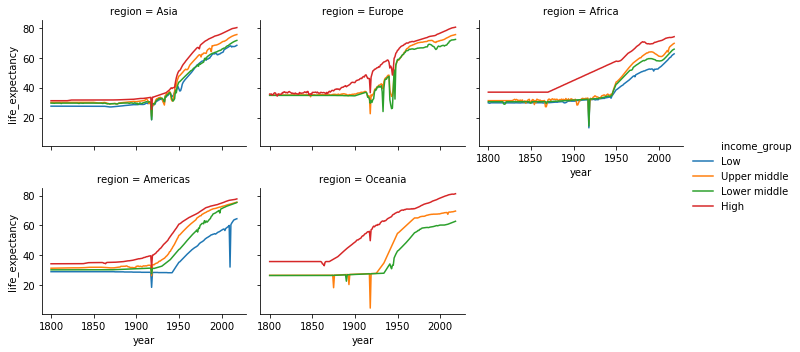

In [38]:
sns.relplot(x='year', y='life_expectancy', data=world_data, estimator='mean',
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3);

What do you think the two sudden drops in the plots show? probably, the two world wars. 

The returned object from `relplot()` is a grid
(a special kind of figure)
with many axes,
and can therefore not be placed within a preexisting figure.
It is saved just as any `matplotlib` figure with `savefig()`,
but has some special methods for easily changing the aesthetics of each axes.

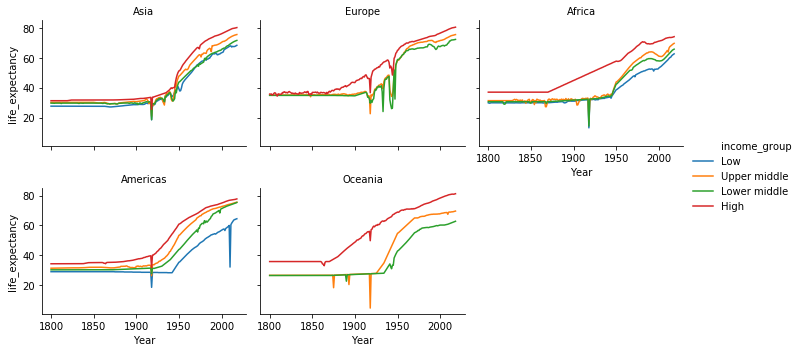

In [24]:
# note that we don't need to explicitly assign estimator since mean is the default 
g = sns.relplot(x='year', y='life_expectancy', data=world_data,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3)

g.set_titles('{col_name}', y=0.95)
g.set_axis_labels(y_var='life_expectancy', x_var='Year')
g.savefig('grid-figure.png')

There is one region and income group in the world that has not been affected by the wars, as the red line in the Africa subplot shows. Let's see what those countries are: 

In [18]:
world_data.loc[(world_data['region'] == 'Africa') & (world_data['income_group'] == 'High'), 'country'].unique()

array(['Seychelles'], dtype=object)

Interesting, one country: Seychelles that is an archipelago of 115 islands in the Indian Ocean, off East Africa.

Remember that names such as `fig`, `ax`, and here `g`,
are only by convention,
and any variable name could have been used.

Let's go back to investigating population growth in the world. We might want the color to indicate income group,
but draw separate lines for each country.
For this we can set `units='country'` and `estimator=None`
(so don't aggregate,
just draw one line per country with the raw values).

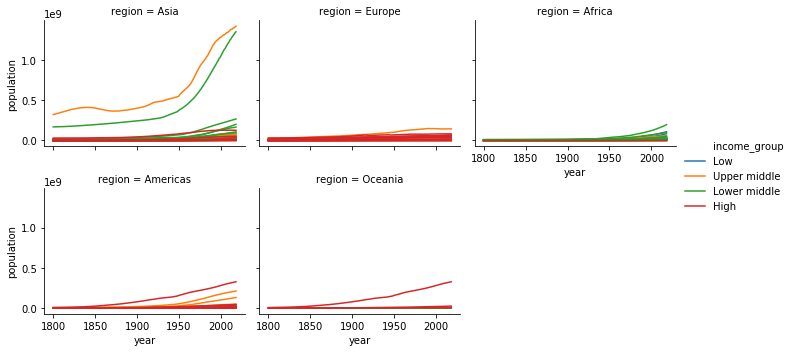

In [14]:
sns.relplot(x='year', y='population', data=world_data, estimator=None, units='country',
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3);

Two countries in Asia stand out in terms of total population.
To find out which these are,
we can filter the data.

In [15]:
world_data.loc[world_data['year'] == 2018].nlargest(8, 'population')

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
7226,China,2018,1420000000,Asia,Eastern Asia,Upper middle,76.9,16000,1.64,9.95,151.0,NaN,NaN,NaN
15767,India,2018,1350000000,Asia,Southern Asia,Lower middle,69.1,6890,2.28,41.10,455.0,NaN,NaN,NaN
37447,United States,2018,327000000,Americas,Northern America,High,79.1,54900,1.90,6.06,35.7,NaN,NaN,NaN
37448,United States,2018,327000000,Oceania,Micronesia,High,79.1,54900,1.90,6.06,35.7,NaN,NaN,NaN
15986,Indonesia,2018,267000000,Asia,South-eastern Asia,Lower middle,72.0,11700,2.31,25.00,147.0,NaN,NaN,NaN
5036,Brazil,2018,211000000,Americas,Latin America and the Caribbean,Upper middle,75.7,14300,1.70,14.20,25.2,NaN,NaN,NaN
26498,Pakistan,2018,201000000,Asia,Southern Asia,Lower middle,68.0,5220,3.35,76.80,260.0,NaN,NaN,NaN
25622,Nigeria,2018,196000000,Africa,Sub-Saharan Africa,Lower middle,66.1,5570,5.39,97.90,215.0,NaN,NaN,NaN


> Challenge 3
>
> 1. To find out the total amount of CO2 released into the atmosphere,
>    used the `co2_per_capita` and `population` columns to create a new column: `co2_total`.
> 2. Plot the total CO2 per year for the world.
> 3. Plot the total CO2 per year for the world and for each region.
> 4. Create a faceted plot comparing total CO2 levels across income groups and regions.

### Visualize relationships conditional on multiple variables (Time permitting)

To continue exploring the CO2 emissions we started to look at in the last challenge,
let's use the other type of plot for comparing quantitative variables:
`scatterplot()`.
This is the default in the  `relplot()` function,
so we don't need to specify `kind='scatter'`)

As mentioned in the discussion above,
in addition to considering the total amount of CO2 produced per country,
it can be insightful to explore the CO2 produced per citizen.

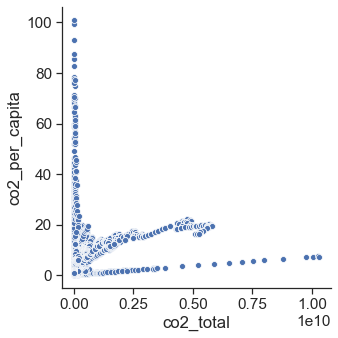

In [56]:
world_data['co2_total'] = world_data['co2_per_capita'] * world_data['population']

sns.relplot(x='co2_total', y='co2_per_capita', data=world_data)

This looks funky,
and not quite as expected...
The reason is that we have plotted multiple data points per country,
one for each year!
This can be confusing
since we don't know which dot is for which year
and this plot is probably not what we wanted to create.
Instead,
we can filter the data to focus on a specific year.
Unfortunately,
there is not CO2 measurements available for the last few years.
To find out in which years there are countries with CO2 measurements,
we can drop the NAs in `co2_per_capita` and look at the min and max value.

In [57]:
world_data.dropna(subset=['co2_per_capita'])['year'].agg(['min', 'max'])

min    1800
max    2014
Name: year, dtype: int64

Now we can subset the data for the latest available year with CO2 measurements,
which is 2014.

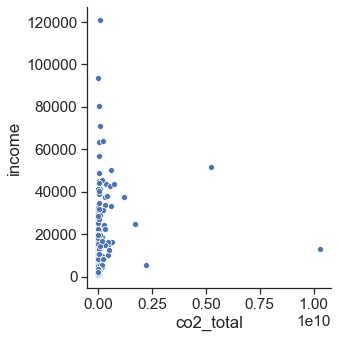

In [58]:
world_data_2014 = world_data.loc[world_data['year'] == 2014]
sns.relplot(x='co2_total', y='income', data=world_data_2014)

This reveals that there are a few countries in the world that have significantly contributed to the co2 emission
and one country that is rather high in both measurements (income and co2 emission).

Just as before,
it is possible to map plot semantics and facet the plot according to variables in the data set.
`scatterplot()` can also scale the dot size according to a variable in the data set.

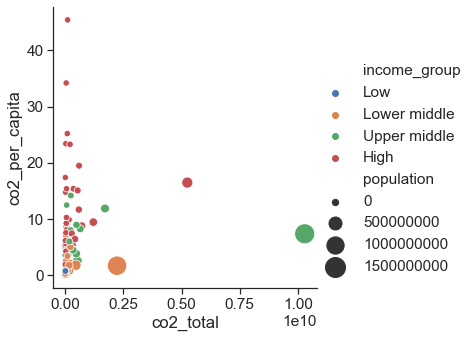

In [60]:
# `sizes` controls the dots min and max size
sns.relplot(x='co2_total', y='co2_per_capita', hue='income_group', size='population',
            data=world_data_2014, sizes=(40, 400));

Unsurprisingly,
some of the countries that are high in the total co2_emissions
are also the most populous countries.
The trends between different regions can now be easily compared
by facetting the data by region.

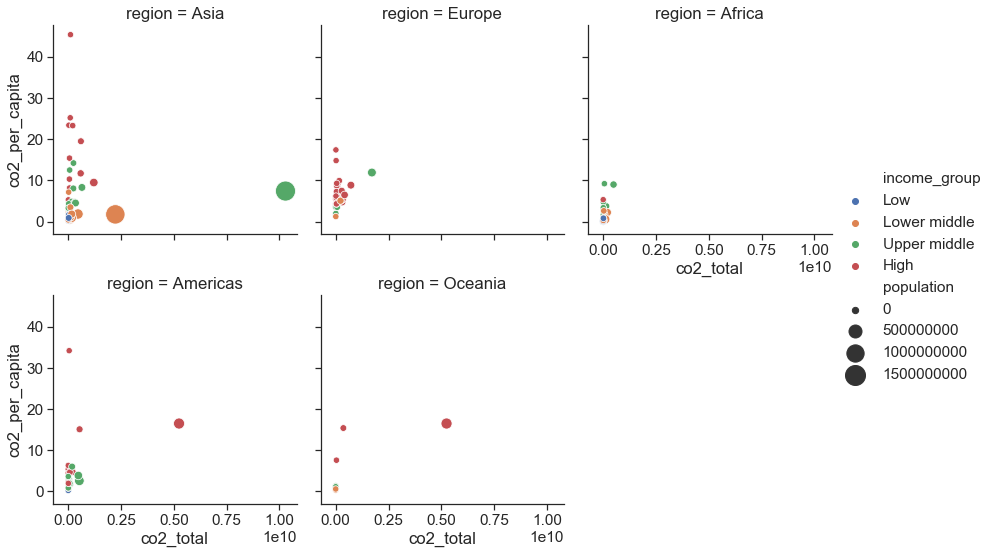

In [62]:
sns.relplot(x='co2_total', y='co2_per_capita', hue='income_group', size='population',
            data=world_data_2014, sizes=(40, 400), col='region', col_wrap=3, height=4);

Already here we can get a pretty good idea of which some of these countries are.
The high emission middle income countries in Asia are likely China and India,
while the American country high in both total emissions and emissions per capita must be the USA.
However,
some observations are harder to resolve,
like which the high co2_capita regions are in Asia and the Americas.

> #### Challenge 4
>
> Let's use some of the aggregation methods from previous session
> to complement the plots we have just made.
>
> 1. Find out which are the 10 countries with the highest co2 emissions per capita. 
> 2. Find out which are the 10 countries with the highest total co2 emissions.
> 3. Which 10 countries have produce the most CO2 in total since the 1800s?

Next week we continute on this example and learn 
- how the relationship between per capita and total CO2 emissions has changed over time for different income groups.
and we explore further: 
- How to know which relationships to start exploring?
- Exploring a single quantitative variable across multiple levels of a categorical variable
- Choose informative plots for categorical data
- visualizing distributions using jointplot